## DSP Chapter 4: Recursion

This notebook references these specific sections:

Ch 4 "Recursion" in Data Structures in Python (DSP):

https://runestone.academy/ns/books/published/pythonds3/Recursion/toctree.html

This notebook by:

***Eric V. Level***  

Graduate Programs in Software Engineering and Data Science  
University of St Thomas
St Paul, MN

Includes material our primary online site...:

- ***Problem Solving with Algorithms and Data Structures using Python***   
by Brad Miller and David Ranum  
Luther College 
(DSP for short)

https://runestone.academy/ns/books/published/pythonds3/index.html?mode=browsing

...along with material from this secondary source.

- ***How to Think Like a Computer Scientist in Python"***   
by Brad Miller and David Ranum  
Luther College 
(HTT for short)

https://runestone.academy/ns/books/published/thinkcspy/index.html#

### DSP-4.1 - Chapter Objectives

The goals for this chapter are as follows:


- To understand that complex problems that may otherwise be difficult to solve may have a simple recursive solution.

- To learn how to formulate programs recursively.

- To understand and apply the three laws of recursion.

- To understand recursion as a form of iteration.

- To implement the recursive formulation of a problem.

- To understand how recursion is implemented by a computer system.

### 4.2 - Getting Started

***Recursion*** is a method of solving problems that involves breaking a problem down into smaller and smaller subproblems until you get to a small enough problem that it can be solved trivially. Usually recursion involves a function calling itself. While it may not seem like much on the surface, recursion allows us to write elegant solutions to problems that may otherwise be very difficult to program.b

### 4.3 - Calculating the Sum of a List of Numbers

We will begin our investigation with a simple problem that you already know how to solve without using recursion. Suppose that you want to calculate the sum of a list of numbers such as: 


In [1]:
[1,3,5,7,9]

[1, 3, 5, 7, 9]

An iterative function that computes the sum is shown in ActiveCode 1. The function uses an accumulator variable (`the_sum`) to compute a running total of all the numbers in the list by starting with `0` and adding each number in the list.


In [2]:
# _dsp-4_3_1-lst_itsum.py

def list_sum(num_list):
    the_sum = 0
    for i in num_list:
        the_sum = the_sum + i
    return the_sum

print(list_sum([1, 3, 5, 7, 9]))


25


Pretend for a minute that you do not have `while` loops or `for` loops. How would you compute the sum of a list of numbers? If you were a mathematician you might start by recalling that addition is a function that is defined for two parameters, a pair of numbers. To redefine the problem from adding a list to adding pairs of numbers, we could rewrite the list as a fully parenthesized expression. Such an expression looks like this:

((((1 + 3) + 5) + 7) + 9)


We can also parenthesize the expression the other way around,

(1 + (3 + (5 + (7 + 9))))

Notice that the innermost set of parentheses, `(7+9)` , is a problem that we can solve without a loop or any special constructs. In fact, we can use the following sequence of simplifications to compute a final sum.

\begin{split}total = \  (1 + (3 + (5 + (7 + 9)))) \\
total = \  (1 + (3 + (5 + 16))) \\
total = \  (1 + (3 + 21)) \\
total = \  (1 + 24) \\
total = \  25\end{split}

How can we take this idea and turn it into a Python program? First, let’s restate the sum problem in terms of Python lists. We might say the sum of the list `num_list` is the sum of the first element of the list (`num_list[0]`) and the sum of the numbers in the rest of the list (`num_list[1:]`). To state it in a functional form:

_list\_sum(num\_list) = first(num\_list) + list\_sum(rest(num\_list))_


In this equation _first(num_list)_ returns the first element of the list and returns a list of everything but the first element. This is easily expressed in Python as shown in ActiveCode 2.

In [3]:
# _dps-4_3_2-lst_recsum.py

def list_sum(num_list):
   if len(num_list) == 1: # line 2
        return num_list[0]
   else:
        return num_list[0] + list_sum(num_list[1:]) # line 5

print(list_sum([1, 3, 5, 7, 9]))


25


There are a few key ideas in this listing to look at. First, on line 2 we are checking to see if the list is one element long. This check is crucial and is our escape clause from the function. The sum of a list of length 1 is trivial; it is just the number in the list. Second, on line 5 our function calls itself! This is the reason that we call the `list_sum` algorithm recursive. **A *recursive* function is a function that calls itself.**

Figure 1 shows the series of recursive calls that are needed to sum the list
. You should think of this series of calls as a series of simplifications. Each time we make a recursive call we are solving a smaller problem, until we reach the point where the problem cannot get any smaller.

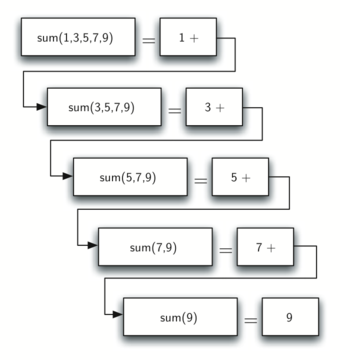

***Figure 1: Series of Recursive Calls Adding a List of Numbers***

When we reach the point where the problem is as simple as it can get, we begin to piece together the solutions of each of the small problems until the initial problem is solved. Figure 2 shows the additions that are performed as `list_sum` works its way backward through the series of calls. When `list_sum` returns from the topmost problem, we have the solution to the whole problem.

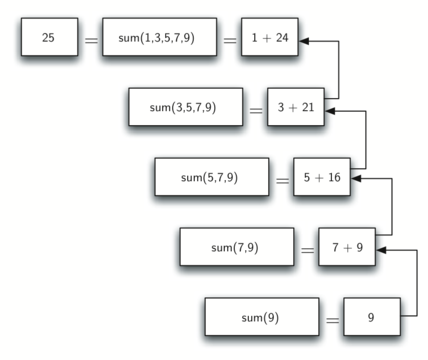

***Figure 2: Series of Recursive Returns from Adding a List of Numbers***

### 4.4 - The Three Laws of Recursion

Like robots in Asimov’s stories, all recursive algorithms must obey three important laws:

1. A recursive algorithm must have a **base case**.

2. A recursive algorithm must change its state and move toward the base case.

3. A recursive algorithm must **call itself** recursively.

Let’s look at each one of these laws in more detail and see how it was used in the `list_sum` algorithm. First, a base case is the condition that allows the algorithm to stop recursing. A base case is typically a problem that is small enough to solve directly. In the `list_sum` algorithm the base case is a list of length 1.

To obey the second law, we must arrange for a change of state that moves the algorithm toward the base case. A change of state means that some data that the algorithm is using is modified. Usually the data that represents our problem gets smaller in some way. In the `list_sum` algorithm our primary data structure is a list, so we must focus our state-changing efforts on the list. Since the base case is a list of length 1, a natural progression toward the base case is to shorten the list. This is exactly what happens on line 5 of ActiveCode 2 when we call `list_sum` with a shorter list.

The final law is that the algorithm must call itself. This is the very definition of recursion. Recursion is a confusing concept to many beginning programmers. As a novice programmer, you have learned that functions are good because you can take a large problem and break it up into smaller problems. The smaller problems can be solved by writing a function to solve each problem. When we talk about recursion it may seem that we are talking ourselves in circles. We have a problem to solve with a function, but that function solves the problem by calling itself! But the logic is not circular at all; the logic of recursion is an elegant expression of solving a problem by breaking it down into a smaller and easier problems.

In the remainder of this chapter we will look at more examples of recursion. In each case we will focus on designing a solution to a problem by using the three laws of recursion.

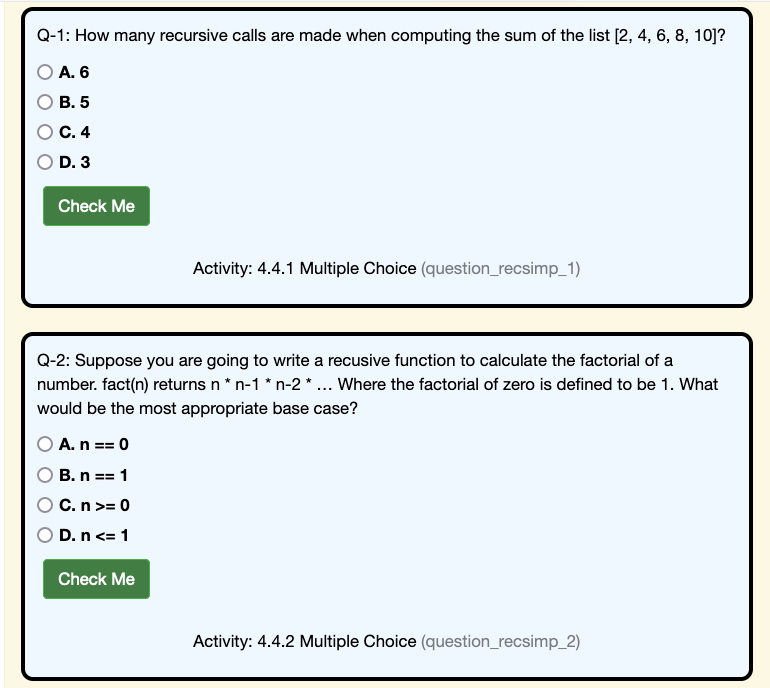

C,D

### 4.5 - Converting an Integer to a String in Any Base

Suppose you want to convert an integer to a string in some base between binary and hexadecimal. For example, convert the integer `10` to its string representation in decimal as `"10"`, or to its string representation in binary as `"1010"`. While there are many algorithms to solve this problem, including the algorithm discussed in the stack section, the recursive formulation of the problem is very elegant.

Let’s look at a concrete example using base 10 and the number `769`. Suppose we have a sequence of characters corresponding to the first 10 digits, like `convert_string = "0123456789"`. It is easy to convert a number less than 10 to its string equivalent by looking it up in the sequence. For example, if the number is `9`, then the string is `convert_string[9]` or `"9"`. If we can arrange to break up the number `769` into three single-digit numbers, `7`, `6`, and `9`, then converting it to a string is simple. A number less than `10` sounds like a good base case.

Knowing what our base is suggests that the overall algorithm will involve three components:

1. Reduce the original number to a series of single-digit numbers.

2. Convert the single digit-number to a string using a lookup.

3. Concatenate the single-digit strings together to form the final result.

The next step is to figure out how to change state and make progress toward the base case. Since we are working with an integer, let’s consider what mathematical operations might reduce a number. The most likely candidates are division and subtraction. While subtraction might work, it is unclear what we should subtract from what. Integer division with remainders gives us a clear direction. Let’s look at what happens if we divide a number by the base we are trying to convert to.

Using integer division to divide 769 by 10, we get 76 with a remainder of 9. This gives us two good results. First, the remainder is a number less than our base that can be converted to a string immediately by lookup. Second, we get a number that is smaller than our original and moves us toward the base case of having a single number less than our base. Now our job is to convert 76 to its string representation. Again we will use integer division plus remainder to get results of 7 and 6 respectively. Finally, we have reduced the problem to converting 7, which we can do easily since it satisfies the base case condition of _n < base_, where _base = 10_. The series of operations we have just performed is illustrated in Figure 3. Notice that the numbers we want to remember are in the remainder boxes along the right side of the diagram.

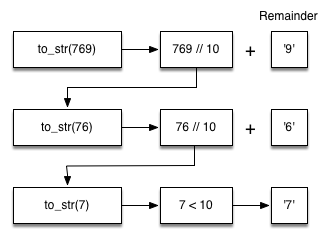

***Figure 3: Converting an Integer to a String in Base 10***

ActiveCode 1 shows the Python code that implements the algorithm outlined above for any base between 2 and 16.

In [4]:
# _dps-4_5_2-lst_rectostr.py

def to_str(n, base):
   convert_string = "0123456789ABCDEF"
   if n < base:
      return convert_string[n]
   else:
      return to_str(n // base, base) + convert_string[n % base]

print(to_str(1453, 16))


5AD


Notice that in line 3 we check for the base case where `n` is less than the `base` we are converting to. When we detect the base case, we stop recursing and simply return the string from the `convert_string` sequence. In line 6 we satisfy both the second and third laws–by making the recursive call and by reducing the problem size–using division.

Let’s trace the algorithm shown in Listing 4.3 again; this time we will convert the number 10 to its base 2 string representation ("1010").

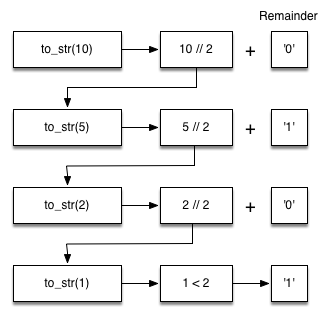

***Figure 4: Converting the Number 10 to its Base 2 String Representation***

### ***Self Check***

1. Write a function that takes a string as a parameter and returns a new string that is the reverse of the old string.

In [6]:
# lab_7_2.py 

# your code here...

def reverse_str(s):
    if len(s)==0:
        return ''
    to_return = reverse_str(s[1:]) + s[0]
    return to_return # return s, reversed...

reverse_str("hello")


'olleh'

2. Write a function that takes a string as a parameter and returns `True` if the string is a palindrome, `False` otherwise. Remember that a string is a palindrome if it is spelled the same both forward and backward. For example: ***radar*** is a palindrome. For bonus points palindromes can also be phrases, but you need to remove the spaces and punctuation before checking. For example: ***madam i’m adam*** is a palindrome. Other fun palindromes include:
```
    kayak

    aibohphobia

    Live not on evil

    Reviled did I live, said I, as evil I did deliver

    Go hang a salami; I’m a lasagna hog.

    Able was I ere I saw Elba

    Kanakanak – a town in Alaska

    Wassamassaw – a town in South Dakota
    
    level - your professor
```

In [7]:
def is_palindrome(s):
    if len(s) <= 1:
        return True
    
    if s[0] != s[-1]:
        return False
    
    return is_palindrome(s[1:-1])

is_palindrome("1")

True

### 4.6 - Stack Frames: Implementing Recursion

Suppose that instead of concatenating the result of the recursive call to `to_str`b with the string from `convert_string`, we modified our algorithm to push the strings onto a stack instead of making the recursive call. The code for this modified algorithm is shown in ActiveCode 1.

In [8]:
# from Class 4 - DPS-3

# or do the import:
# from pythonds3.basic import Stack

class Stack:
    """Stack implementation as a list"""

    def __init__(self):
        """Create new stack"""
        self._items = []

    def is_empty(self):
        """Check if the stack is empty"""
        return not bool(self._items)

    def push(self, item):
        """Add an item to the stack"""
        self._items.append(item)

    def pop(self):
        """Remove an item from the stack"""
        return self._items.pop()

    def peek(self):
        """Get the value of the top item in the stack"""
        return self._items[-1]

    def size(self):
        """Get the number of items in the stack"""
        return len(self._items)


In [9]:
# _dps-4_6_1-lst_recstack.py

# if you've installed the book's pythonds3 packages, 
#  you can uncomment the following

# from pythonds3.basic import Stack

def to_str(n, base):
    r_stack = Stack()
    convert_string = "0123456789ABCDEF"
    while n > 0:
        if n < base:
            r_stack.push(convert_string[n])
        else:
            r_stack.push(convert_string[n % base])
        n = n // base
    res = ""
    while not r_stack.is_empty():
        res = res + str(r_stack.pop())
    return res


print(to_str(1453, 16))
print(to_str(2209, 7))


5AD
6304


Each time we make a call to `to_str`, we push a character on the stack. Returning to the previous example we can see that after the fourth call to to_str the stack would look like Figure 5. Notice that now we can simply pop the characters off the stack and concatenate them into the final result, `"1010"`b.

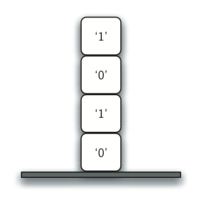

***Figure 5: Strings Placed on the Stack During Conversion***

The previous example gives us some insight into how Python implements a recursive function call. When a function is called in Python, a **stack frame** is allocated to handle the local variables of the function. When the function returns, the return value is left on top of the stack for the calling function to access. Figure 6 illustrates the call stack after the return statement on line 4.

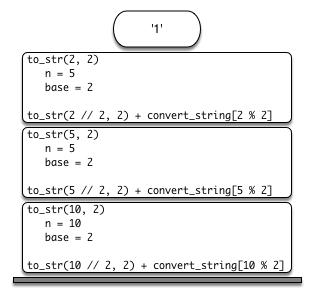

***Figure 6: Call Stack Generated from `to_str(10, 2)`***

Notice that the call to `to_str(2 // 2, 2)` defined in Listing 4.4 leaves a return value of `"1"` on the stack. This return value is then used in place of the function call (`to_str(1, 2`)) in the expression `"1" + convert_string[2 % 2]`, which will leave the string `"10"` on the top of the stack. In this way, the Python call stack takes the place of the stack we used explicitly in Listing 4. In our list summing example, you can think of the return value on the stack taking the place of an accumulator variable.

The stack frames also provide a scope for the variables used by the function. Even though we are calling the same function over and over, each call creates a new scope for the variables that are local to the function.

### 4.7 - Visualizing Recursion

In the previous section we looked at some problems that were easy to solve using recursion; however, it can still be difficult to find a mental model or a way of visualizing what is happening in a recursive function. This can make recursion difficult for people to grasp. In this section we will look at a couple of examples of using recursion to draw some interesting pictures. As you watch these pictures take shape you will get some new insight into the recursive process that may be helpful in cementing your understanding of recursion.

The tool we will use for our illustrations is Python’s turtle graphics module called `turtle`. The turtle module is standard with all versions of Python and is very easy to use. The metaphor is quite simple. You can create a turtle and the turtle can move forward, move backward, turn left, turn right, etc. The turtle can have its tail up or down. When the turtle’s tail is down and the turtle moves, it draws a line as it moves. To increase the artistic value of the turtle, you can change the width of the tail as well as the color of the ink the tail is dipped in.

Here is a simple example to illustrate some turtle graphics basics. We will use the `turtle` module to draw a spiral recursively. ActiveCode 1 shows how it is done. After importing the `turtle` module we create a turtle. When the turtle is created it also creates a window for itself to draw in. Next we define the `draw_spiral` function. The base case for this simple function is when the length of the line we want to draw, as given by the len parameter, is reduced to zero or less. If the length of the line is longer than zero, we instruct the turtle to go forward by len units and then turn right 90 degrees. The recursive step is when we call draw_spiral again with a reduced length. At the end of ActiveCode 1 you will notice that we call the function `my_win.exitonclick()`. This is a handy little method of the window that puts the turtle into a wait mode until you click inside the window, after which the program cleans up and exits. ***But it doesn't work correctly in Jupyter Notebooks...***

In [10]:
# _dps-4_7_1-lst_turt1.py

# the following works in the Jupyter Notebook, but won't close the window:  try it!
# solution?  run it in PyCharm...

import turtle

def draw_spiral(my_turtle, line_len):
    if line_len > 0:
        my_turtle.forward(line_len)
        my_turtle.right(90)
        draw_spiral(my_turtle, line_len - 5)


my_turtle = turtle.Turtle()
my_win = turtle.Screen()
draw_spiral(my_turtle, 100)

turtle.done()
try:
    my_win.exitonclick()
    turtle.bye()
except:
    print("bye")


bye


That is really about all the turtle graphics you need to know in order to make some pretty impressive drawings. For our next program we will turn to fractals. Fractals come from a branch of mathematics, and have much in common with recursion. By definition, a **fractal** has the same basic shape no matter how much you magnify it. Some examples from nature are the coastlines of continents, snowflakes, mountains, and even trees or shrubs. The fractal nature of many of these natural phenomena makes it possible for programmers to generate very realistic looking scenery for computer-generated movies. In our next example we will generate a fractal tree.

To understand how this is going to work it is helpful to think of how we might describe a tree using a fractal vocabulary. Remember that we said above that a fractal is something that looks the same at all different levels of magnification. If we translate this to trees and shrubs, we might say that even a small twig has the same shape and characteristics as a whole tree. Using this idea we could say that a tree is a trunk, with a smaller tree going off to the right and another smaller tree going off to the left. If you think of this definition recursively, it means that we will apply the recursive definition of a tree to both of the smaller left and right trees.

Let’s translate this idea to some Python code. Listing 1 shows how we can use our turtle to generate a fractal tree. Let’s look at the code a bit more closely. You will see that on lines 5 and 7 we are making a recursive call. On line 5 we make the recursive call right after the turtle turns to the right by 20 degrees; this is the right tree mentioned above. Then in line 7 the turtle makes another recursive call, but this time after turning left by 40 degrees. The reason the turtle must turn left by 40 degrees is that it needs to undo the original 20-degree turn to the right and then do an additional 20-degree turn to the left in order to draw the left tree. Also notice that each time we make a recursive call to tree we subtract some amount from the `branch_len` parameter; this is to make sure that the recursive trees get smaller and smaller. You should also recognize the initial `if` statement on line 2 as a check for the base case of `branch_len` getting too small.

### Listing 1
   
```
    def tree(branch_len, t):
        if branch_len > 5:
            t.forward(branch_len)
            t.right(20)
            tree(branch_len - 15, t)
            t.left(40)
            tree(branch_len - 15, t)
            t.right(20)
            t.backward(branch_len)
```

The complete program for this tree example is shown in ActiveCode 2. Before you run the code think about how you expect to see the tree take shape. Look at the recursive calls and think about how this tree will unfold. Will it be drawn symmetrically with the right and left halves of the tree taking shape simultaneously? Will it be drawn right side first then left side?

In [11]:
# _dsp-4_7_2-lst_complete_tree.py

# Run this in PyCharm...

import turtle


def tree(branch_len, t):
    if branch_len > 5:
        t.forward(branch_len)
        t.right(20)
        tree(branch_len - 15, t)
        t.left(40)
        tree(branch_len - 15, t)
        t.right(20)
        t.backward(branch_len)

def main():
    t = turtle.Turtle()
    my_win = turtle.Screen()
    t.left(90)
    t.up()
    t.backward(100)
    t.down()
    t.color("green")
    tree(75, t)
    my_win.exitonclick()

main()


Terminator: 

Notice how each branch point on the tree corresponds to a recursive call, and notice how the tree is drawn to the right all the way down to its shortest twig. You can see this in Figure 1. Now, notice how the program works its way back up the trunk until the entire right side of the tree is drawn. You can see the right half of the tree in Figure 2. Then the left side of the tree is drawn, but not by going as far out to the left as possible. Rather, once again the entire right side of the left tree is drawn until we finally make our way out to the smallest twig on the left.

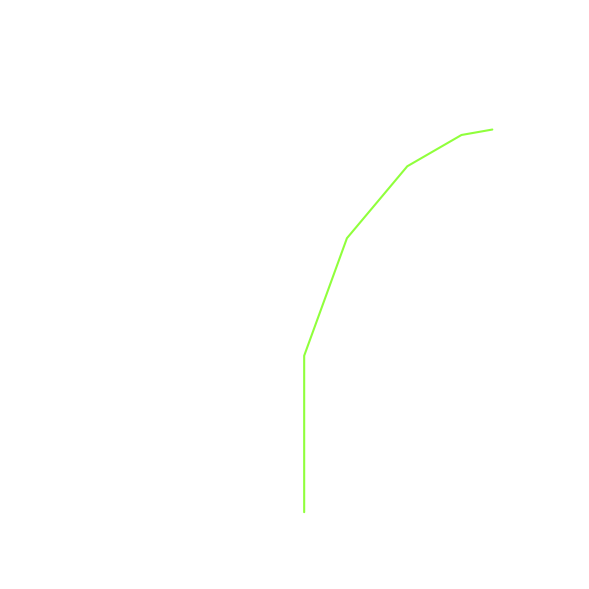

***Figure 1: The Beginning of a Fractal Tree***

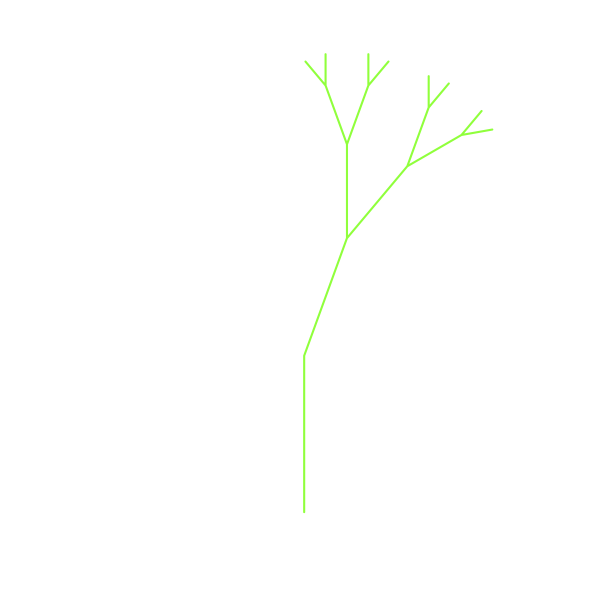

***Figure 2: The First Half of the Tree***

### Self Check

Modify the recursive tree program in PyCharm using one or all of the following ideas:

- Modify the thickness of the branches so that as the `branch_len` gets smaller, the line gets thinner.

- Modify the color of the branches so that as the `branch_len` gets very short it is colored like a leaf.

- Modify the angle used in turning the turtle so that at each branch point the angle is selected at random in some range. For example choose the angle between 15 and 45 degrees. Play around to see what looks good.

- Modify the `branch_len` recursively so that instead of always subtracting the same amount you subtract a random amount in some range.

In [ ]:
# copy of the above...

# _dsp-4_7_2-lst_complete_tree.py

# Run this in PyCharm...

import turtle


def tree(branch_len, t):
    t.penwidth()
    if branch_len > 5:
        t.forward(branch_len)b
        t.right(20)
        tree(branch_len - 15, t)
        t.left(40)
        tree(branch_len - 15, t)
        t.right(20)
        t.backward(branch_len)

def main():
    t = turtle.Turtle()
    my_win = turtle.Screen()
    t.left(90)
    t.up()
    t.backward(100)
    t.down()
    t.color("green")
    tree(75, t)
    my_win.exitonclick()

main()


### 4.8 - Sierpinski Triangle

Another fractal that exhibits the property of self-similarity is the Sierpinski triangle. An example is shown in Figure 3. The ***Sierpinski triangle*** illustrates a three-way recursive algorithm. The procedure for drawing a Sierpinski triangle by hand is simple. Start with a single large triangle. Divide this large triangle into four new triangles by connecting the midpoint of each side. Ignoring the middle triangle that you just created, apply the same procedure to each of the three corner triangles. Each time you create a new set of triangles, you recursively apply this procedure to the three smaller corner triangles. You can continue to apply this procedure indefinitely if you have a sharp enough pencil. Before you continue reading, you may want to try drawing the Sierpinski triangle yourself, using the method described.

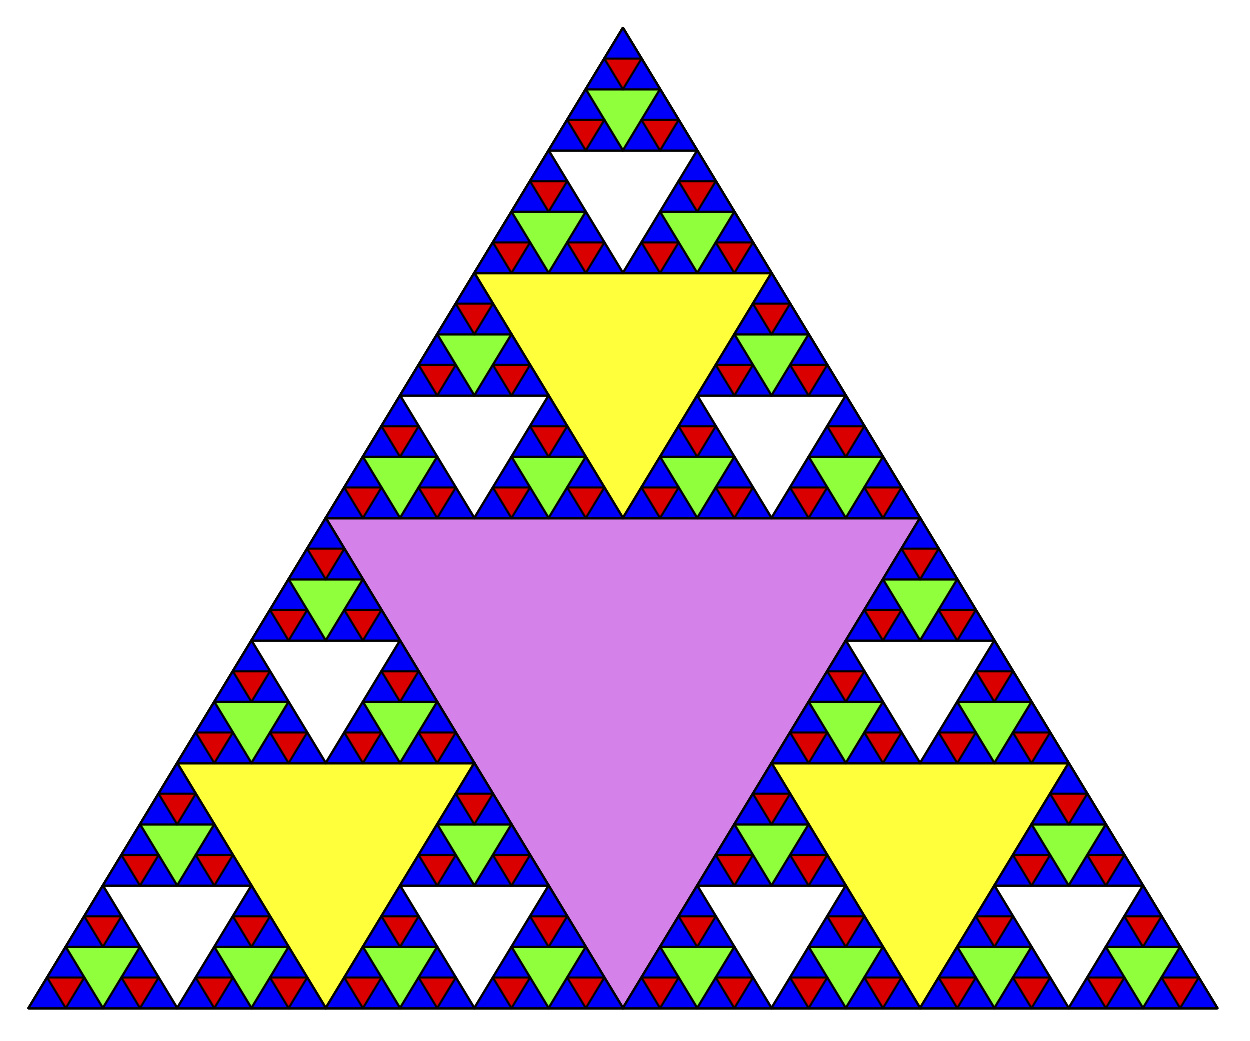

***Figure 3: The Sierpinski Triangle***

Since we can continue to apply the algorithm indefinitely, what is the base case? We will see that the base case is set arbitrarily as the number of times we want to divide the triangle into pieces. Sometimes we call this number the degree of the fractal. Each time we make a recursive call, we subtract 1 from the degree until we reach 0. When we reach a degree of 0, we stop making recursive calls. The code that generated the Sierpinski Triangle in Figure 3 is shown in ActiveCode 1.

In [ ]:
# _dsp-4_8_1_lst_st.py

# run this in PyCharm

import turtle


def draw_triangle(points, color, my_turtle):
    my_turtle.fillcolor(color)
    my_turtle.up()
    my_turtle.goto(points[0][0], points[0][1])
    my_turtle.down()
    my_turtle.begin_fill()
    my_turtle.goto(points[1][0], points[1][1])
    my_turtle.goto(points[2][0], points[2][1])
    my_turtle.goto(points[0][0], points[0][1])
    my_turtle.end_fill()


def get_mid(p1, p2):
    return ((p1[0] + p2[0]) / 2, (p1[1] + p2[1]) / 2)


def sierpinski(points, degree, my_turtle):
    colormap = ["blue", "red", "green", "white", "yellow", "violet", "orange"]
    draw_triangle(points, colormap[degree], my_turtle)
    if degree > 0:
        sierpinski(
            [points[0], get_mid(points[0], points[1]), get_mid(points[0], points[2])],
            degree - 1,
            my_turtle,
        )
        sierpinski(
            [points[1], get_mid(points[0], points[1]), get_mid(points[1], points[2])],
            degree - 1,
            my_turtle,
        )
        sierpinski(
            [points[2], get_mid(points[2], points[1]), get_mid(points[0], points[2])],
            degree - 1,
            my_turtle,
        )


def main():
    my_turtle = turtle.Turtle()
    my_win = turtle.Screen()
    my_points = [[-180, -150], [0, 150], [180, -150]]
    sierpinski(my_points, 5, my_turtle)
    my_win.exitonclick()


main()


The program in ActiveCode 1 follows the ideas outlined above. The first thing sierpinski does is draw the outer triangle. Next, there are three recursive calls, one for each of the new corner triangles we get when we connect the midpoints. Once again we make use of the standard turtle module that comes with Python. You can learn all the details of the methods available in the turtle module by using help("turtle") from the Python prompt.

Look at the code and think about the order in which the triangles will be drawn. While the exact order of the corners depends upon how the initial set is specified, let’s assume that the corners are ordered lower left, top, lower right. Because of the way the sierpinski function calls itself, sierpinski works its way to the smallest allowed triangle in the lower-left corner and then begins to fill out the rest of the triangles working back. Then it fills in the triangles in the top corner by working toward the smallest, topmost triangle. Finally, it fills in the lower-right corner, working its way toward the smallest triangle in the lower right.

Sometimes it is helpful to think of a recursive algorithm in terms of a diagram of function calls. Figure 4 shows that the recursive calls are always made going to the left. The active functions are outlined in black, and the inactive function calls are in gray. The farther you go toward the bottom of Figure 4, the smaller the triangles. The function finishes drawing one level at a time; once it is finished with the bottom left it moves to the bottom middle, and so on.


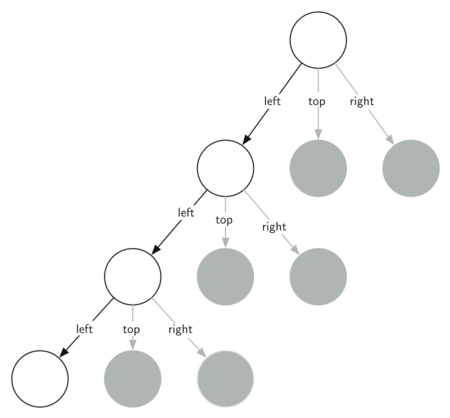

***Figure 4: Building a Sierpinski Triangle***

The `sierpinski` function relies heavily on the `get_mid` function. `get_mid` takes as arguments two endpoints and returns the point halfway between them. In addition, ActiveCode 1 has a function that draws a filled triangle using the `begin_fill` and `end_fill` turtle methods.

### 4.9 - Complex Recursive Problems

In the previous sections we looked at some problems that are relatively easy to solve and some graphically interesting problems that can help us gain a mental model of what is happening in a recursive algorithm. In this section we will look at some problems that are really difficult to solve using an iterative programming style but are very elegant and easy to solve using recursion. We will finish up by looking at a deceptive problem that at first looks like it has an elegant recursive solution but in fact does not.

### 4.10 - Tower of Hanoi

The Tower of Hanoi puzzle was invented by the French mathematician Edouard Lucas in 1883. He was inspired by a legend that tells of a Hindu temple where the puzzle was presented to young priests. At the beginning of time, the priests were given three poles and a stack of 64 gold disks, each disk a little smaller than the one beneath it. Their assignment was to transfer all 64 disks from one of the three poles to another, with two important constraints. They could only move one disk at a time, and they could never place a larger disk on top of a smaller one. The priests worked very efficiently, day and night, moving one disk every second. When they finished their work, the legend said, the temple would crumble into dust and the world would vanish.

Although the legend is interesting, you need not worry about the world ending any time soon. The number of moves required to correctly move a tower of 64 disks is 2^{64}-1 = 18,446,744,073,709,551,615. 

At a rate of one move per second, that is 584,942,417,355 years! Clearly there is more to this puzzle than meets the eye.

Figure 1 shows an example of a configuration of disks in the middle of a move from the first peg to the third. Notice that, as the rules specify, the disks on each peg are stacked so that smaller disks are always on top of the larger disks. If you have not tried to solve this puzzle before, you should try it now. You do not need fancy disks and poles—a pile of books or pieces of paper will work.


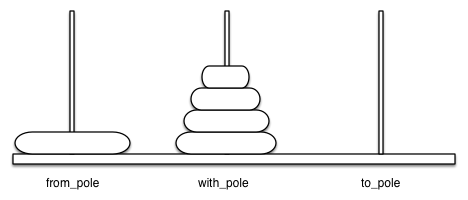

***Figure 1: An Example Arrangement of Disks for the Tower of Hanoi***

In [1]:
# _dsp-4_1-listing_1.py

def move_tower(height, from_pole, to_pole, with_pole):
    if height < 1:
        return
    move_tower(height - 1, from_pole, with_pole, to_pole)
    move_disk(from_pole, to_pole)
    move_tower(height - 1, with_pole, to_pole, from_pole)

Notice that the code in Listing 1 is almost identical to the English description. The key to the simplicity of the algorithm is that we make two different recursive calls, one on line 4 and a second on line 6. On line 4 we move all but the bottom disk on the initial tower to an intermediate pole. The next line moves the bottom disk to its final resting place. Then on line 6 we move the tower from the intermediate pole to the top of the largest disk. The base case is the tower of height 0; in this case there is nothing to do, so the `move_tower` function returns. The important thing to remember about handling the base case this way is that simply returning from move_tower is what finally allows the `move_disk` function to be called.

The function `move_disk`, shown in Listing 2, is very simple. All it does is print out that it is moving a disk from one pole to another. If you type in and run the `move_tower` program you can see that it gives you a very efficient solution to the puzzle.

In [2]:
# _dsp-4_10_1-hanoi.py (Listing 2)

def move_tower(height, from_pole, to_pole, with_pole):
    if height >= 1:
        move_tower(height - 1, from_pole, with_pole, to_pole)
        move_disk(from_pole, to_pole)
        move_tower(height - 1, with_pole, to_pole, from_pole)

def move_disk(from_p, to_p):
    print("moving disk from", from_p, "to", to_p)


move_tower(3, "A", "B", "C")


moving disk from A to B
moving disk from A to C
moving disk from B to C
moving disk from A to B
moving disk from C to A
moving disk from C to B
moving disk from A to B


Now that you have seen the code for both `move_tower` and `move_disk`, you may be wondering why we do not have a data structure that explicitly keeps track of what disks are on what poles. Here is a hint: if you were going to explicitly keep track of the disks, you would probably use three `Stack` objects, one for each pole. The answer is that Python provides the stacks that we need implicitly through the call stack.

### 4.11 - Exploring a Maze

In this section we will look at a problem that has relevance to the expanding world of robotics: how do you find your way out of a maze? If you have a Roomba vacuum cleaner for your dorm room (don’t all college students?) you will wish that you could reprogram it using what you have learned in this section. The problem we want to solve is to help our turtle find its way out of a virtual maze. The maze problem has roots as deep as the Greek myth about Theseus, who was sent into a maze to kill the Minotaur. Theseus used a ball of thread to help him find his way back out again once he had finished off the beast. In our problem we will assume that our turtle is dropped down somewhere into the middle of the maze and must find its way out. Look at Figure 2 to get an idea of where we are going in this section.

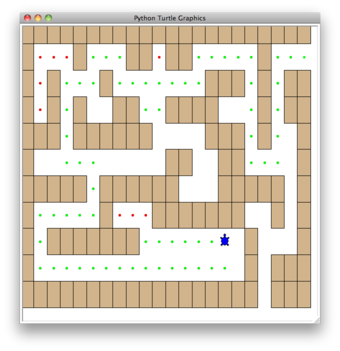

***Figure 2: The Finished Maze Search Program***

To make it easier for us we will assume that our maze is divided up into squares. Each square of the maze is either open or occupied by a section of wall. The turtle can only pass through the open squares of the maze. If the turtle bumps into a wall, it must try a different direction. The turtle will require a systematic procedure to find its way out of the maze. Here is the procedure:

1. From our starting position we will first try going north one square and then recursively try our procedure from there.

2. If we are not successful by trying a northern path as the first step then we will take a step to the south and recursively repeat our procedure.

3. If south does not work then we will try a step to the West as our first step and recursively apply our procedure.

4. If north, south, and west have not been successful then we will apply the procedure recursively from a position one step to our east.

5. If none of these directions works then there is no way to get out of the maze and we fail.


Now that sounds pretty easy, but there are a couple of details to talk about first. Suppose we take our first recursive step by going north. By following our procedure, our next step would also be to the north. But if the north is blocked by a wall, we must look at the next step of the procedure and try going to the south. Unfortunately, that step to the south brings us right back to our original starting place. If we apply the recursive procedure from there, we will just go back one step to the North and be in an infinite loop. So we must have a strategy to remember where we have been. In this case we will assume that we have a bag of bread crumbs we can drop along our way. If we take a step in a certain direction and find that there is a bread crumb already on that square, we know that we should immediately back up and try the next direction in our procedure. As we will see when we look at the code for this algorithm, backing up is as simple as returning from a recursive function call.

As we do for all recursive algorithms, let us review the base cases. Some of them you may already have guessed based on the description in the previous paragraph. In this algorithm, there are four base cases to consider:

1. The turtle has run into a wall. Since the square is occupied by a wall, no further exploration can take place.

2. The turtle has found a square that has already been explored. We do not want to continue exploring from this position so we don’t get into a loop.

3. We have found an outside edge, not occupied by a wall. In other words, we have found an exit from the maze.

4. We have explored a square unsuccessfully in all four directions.

For our program to work we will need to have a way to represent the maze. To make this even more interesting we are going to use the turtle module to draw and explore our maze so we can watch this algorithm in action. The Maze object will provide the following methods for us to use in writing our search algorithm:

`__init__` Reads in a data file representing a maze, initializes the internal representation of the maze, and finds the starting position for the turtle.

`draw_maze` Draws the maze in a window on the screen.

`update_position` Updates the internal representation of the maze and changes the position of the turtle in the window.

`is_exit` Checks to see if the current position is an exit from the maze.

The `Maze` class also overloads the index operator `[]`b so that our algorithm can easily access the status of any particular square.

Let’s examine the code for the search function which we call `search_from`. The code is shown in Listing 3. Notice that this function takes three parameters: a Maze object, the starting row, and the starting column. This is important because as a recursive function the search logically starts again with each recursive call.

In [ ]:
# _dsp-4_11_1-listing3.py

def search_from(maze, row, column):

    # Try each of four directions from this point until we find a way out.

    maze.update_position(row, column)

    # Base Case return values:
    #  1. We have run into an obstacle, return false

    if maze[row][column] == OBSTACLE:
        return False

    #  2. We have found an already explored square

    if maze[row][column] in [TRIED, DEAD_END]:
        return False

    # 3. We have found an exit

    if maze.is_exit(row, column):
        maze.update_position(row, column, PART_OF_PATH)
        return True

    maze.update_position(row, column, TRIED)

    # Otherwise, use logical short circuiting to try each direction

    # in turn (if needed)

    found = (

        search_from(maze, row - 1, column)

        or search_from(maze, row + 1, column)

        or search_from(maze, row, column - 1)

        or search_from(maze, row, column + 1)

    )
    if found:

        maze.update_position(row, column, PART_OF_PATH)

    else:

        maze.update_position(row, column, DEAD_END)

    return found

As you look through the algorithm you will see that the first thing the code does (line 3) is call update_position. This is simply to help you visualize the algorithm so that you can watch exactly how the turtle explores its way through the maze. Next the algorithm checks for the first three of the four base cases: Has the turtle run into a wall (lines 6)? Has the turtle circled back to a square already explored (line 9)? Has the turtle found an exit (line 12)? If none of these conditions is true then we continue the search recursively.

You will notice that in the recursive step there are four recursive calls to search_from. It is hard to predict how many of these recursive calls will be used since they are all connected by or statements. If the first call to search_from returns True then none of the last three calls would be needed. You can interpret this as meaning that a step to (row - 1, column) (or north if you want to think geographically) is on the path leading out of the maze. If there is not a good path leading out of the maze to the north then the next recursive call is tried, this one to the south. If south fails then try west, and finally east. If all four recursive calls return False then we have found a dead end. You should download or type in the whole program and experiment with it by changing the order of these calls.

The code for the Maze class is shown in Listing 4, Listing 5, and Listing 6. The __init__ method takes the name of a file as its only parameter. This file is a text file that represents a maze by using “+” characters for walls, spaces for open squares, and the letter “S” to indicate the starting position. Figure 3 is an example of a maze data file. The internal representation of the maze is a list of lists. Each row of the maze_list instance variable is also a list. This secondary list contains one character per square using the characters described above. For the data file in Figure 3 the internal representation looks like the following:

```
[ ['+','+','+','+',...,'+','+','+','+','+','+','+'],
  ['+',' ',' ',' ',...,' ',' ',' ','+',' ',' ',' '],
  ['+',' ','+',' ',...,'+','+',' ','+',' ','+','+'],
  ['+',' ','+',' ',...,' ',' ',' ','+',' ','+','+'],
  ['+','+','+',' ',...,'+','+',' ','+',' ',' ','+'],
  ['+',' ',' ',' ',...,'+','+',' ',' ',' ',' ','+'],
  ['+','+','+','+',...,'+','+','+','+','+',' ','+'],
  ['+',' ',' ',' ',...,'+','+',' ',' ','+',' ','+'],
  ['+',' ','+','+',...,' ',' ','+',' ',' ',' ','+'],
  ['+',' ',' ',' ',...,' ',' ','+',' ','+','+','+'],
  ['+','+','+','+',...,'+','+','+',' ','+','+','+']]
```


The `draw_maze` method uses this internal representation to draw the initial view of the maze on the screen.


```
++++++++++++++++++++++
+   +   ++ ++     +
+ +   +       +++ + ++
+ + +  ++  ++++   + ++
+++ ++++++    +++ +  +
+          ++  ++    +
+++++ ++++++   +++++ +
+     +   +++++++  + +
+ +++++++      S +   +
+                + +++
++++++++++++++++++ +++
```
maze1.txt

***Figure 3: An Example Maze Data File***

The `update_position` method, as shown in Listing 5 uses the same internal representation to see if the turtle has run into a wall. It also updates the internal representation with a “.” or “-” to indicate that the turtle has visited a particular square or if the square is part of a dead end. In addition, the update_position method uses two helper methods, `move_turtle` and `drop_bread_crumb`, to update the view on the screen.

Finally, the `is_exit method` uses the current position of the turtle to test for an exit condition. An exit condition is whenever the turtle has navigated to the edge of the maze, either row zero or column zero, or the far-right column or the bottom row.

```
# Listing 4

class Maze:
    def __init__(self, maze_filename):
        rows_in_maze = 0
        columns_in_maze = 0
        self.maze_list = []
        maze_file = open(maze_filename, "r")
        rows_in_maze = 0
        for line in maze_file:
            row_list = []
            col = 0
            for ch in line[:-1]:
                row_list.append(ch)
                if ch == "S":
                    self.start_row = rows_in_maze
                    self.start_col = col
                col = col + 1
            rows_in_maze = rows_in_maze + 1
            self.maze_list.append(row_list)
            columns_in_maze = len(row_list)

        self.rows_in_maze = rows_in_maze
        self.columns_in_maze = columns_in_maze
        self.x_translate = -columns_in_maze / 2
        self.y_translate = rows_in_maze / 2
        self.t = turtle.Turtle()
        self.t.shape("turtle")
        self.wn = turtle.Screen()
        self.wn.setworldcoordinates(
            -(columns_in_maze - 1) / 2 - 0.5,
            -(rows_in_maze - 1) / 2 - 0.5,
            (columns_in_maze - 1) / 2 + 0.5,
            (rows_in_maze - 1) / 2 + 0.5,
        )
```

```
# Listing 5

def draw_maze(self):
    self.t.speed(10)
    self.wn.tracer(0)
    for y in range(self.rows_in_maze):
        for x in range(self.columns_in_maze):
            if self.maze_list[y][x] == OBSTACLE:
                self.draw_centered_box(
                    x + self.x_translate, -y + self.y_translate, "orange"
                )
    self.t.color("black")
    self.t.fillcolor("blue")
    self.wn.update()
    self.wn.tracer(1)

def draw_centered_box(self, x, y, color):
    self.t.up()
    self.t.goto(x - 0.5, y - 0.5)
    self.t.color(color)
    self.t.fillcolor(color)
    self.t.setheading(90)
    self.t.down()
    self.t.begin_fill()
    for i in range(4):
        self.t.forward(1)
        self.t.right(90)
    self.t.end_fill()

def move_turtle(self, x, y):
    self.t.up()
    self.t.setheading(self.t.towards(x + self.x_translate, -y + self.y_translate))
    self.t.goto(x + self.x_translate, -y + self.y_translate)

def drop_bread_crumb(self, color):
    self.t.dot(10, color)

def update_position(self, row, col, val=None):
    if val:
        self.maze_list[row][col] = val
    self.move_turtle(col, row)

    if val == PART_OF_PATH:
        color = "green"
    elif val == OBSTACLE:
        color = "red"
    elif val == TRIED:
        color = "black"
    elif val == DEAD_END:
        color = "red"
    else:
        color = None

    if color:
        self.drop_bread_crumb(color)
```

```
# Listing 6

def is_exit(self, row, col):
    return (
        row == 0
        or row == self.rows_in_maze - 1
        or col == 0
        or col == self.columns_in_maze - 1
    )

def __getitem__(self, idx):
    return self.maze_list[idx]
```

The complete program is shown in ActiveCode 1. This program uses the data file `maze2.txt` shown below. Note that it is a much more simple example file in that the exit is very close to the starting position of the turtle.

```
++++++++++++++++++++++
+   +   ++ ++        +
      +     ++++++++++
+ +    ++  ++++ +++ ++
+ +   + + ++    +++  +
+          ++  ++  + +
+++++ + +      ++  + +
+++++ +++  + +  ++   +
+          + + S+ +  +
+++++ +  + + +     + +
++++++++++++++++++++++
```
maze2.txt

In [ ]:
# _dsp-4_11_1-completemaze.py

import turtle

PART_OF_PATH = "O"
TRIED = "."
OBSTACLE = "+"
DEAD_END = "-"


class Maze:
    def __init__(self, maze_filename):
        rows_in_maze = 0
        columns_in_maze = 0
        self.maze_list = []
        maze_file = open(maze_filename, "r")
        rows_in_maze = 0
        for line in maze_file:
            row_list = []
            col = 0
            for ch in line[:-1]:
                row_list.append(ch)
                if ch == "S":
                    self.start_row = rows_in_maze
                    self.start_col = col
                col = col + 1
            rows_in_maze = rows_in_maze + 1
            self.maze_list.append(row_list)
            columns_in_maze = len(row_list)

        self.rows_in_maze = rows_in_maze
        self.columns_in_maze = columns_in_maze
        self.x_translate = -columns_in_maze / 2
        self.y_translate = rows_in_maze / 2
        self.t = turtle.Turtle()
        self.t.shape("turtle")
        self.wn = turtle.Screen()
        self.wn.setworldcoordinates(
            -(columns_in_maze - 1) / 2 - 0.5,
            -(rows_in_maze - 1) / 2 - 0.5,
            (columns_in_maze - 1) / 2 + 0.5,
            (rows_in_maze - 1) / 2 + 0.5,
        )

    def draw_maze(self):
        self.t.speed(10)
        self.wn.tracer(0)
        for y in range(self.rows_in_maze):
            for x in range(self.columns_in_maze):
                if self.maze_list[y][x] == OBSTACLE:
                    self.draw_centered_box(
                        x + self.x_translate, -y + self.y_translate, "orange"
                    )
        self.t.color("black")
        self.t.fillcolor("blue")
        self.wn.update()
        self.wn.tracer(1)

    def draw_centered_box(self, x, y, color):
        self.t.up()
        self.t.goto(x - 0.5, y - 0.5)
        self.t.color(color)
        self.t.fillcolor(color)
        self.t.setheading(90)
        self.t.down()
        self.t.begin_fill()
        for i in range(4):
            self.t.forward(1)
            self.t.right(90)
        self.t.end_fill()

    def move_turtle(self, x, y):
        self.t.up()
        self.t.setheading(self.t.towards(x + self.x_translate, -y + self.y_translate))
        self.t.goto(x + self.x_translate, -y + self.y_translate)

    def drop_bread_crumb(self, color):
        self.t.dot(10, color)

    def update_position(self, row, col, val=None):
        if val:
            self.maze_list[row][col] = val
        self.move_turtle(col, row)

        if val == PART_OF_PATH:
            color = "green"
        elif val == OBSTACLE:
            color = "red"
        elif val == TRIED:
            color = "black"
        elif val == DEAD_END:
            color = "red"
        else:
            color = None

        if color:
            self.drop_bread_crumb(color)

    def is_exit(self, row, col):
        return (
            row == 0
            or row == self.rows_in_maze - 1
            or col == 0
            or col == self.columns_in_maze - 1
        )

    def __getitem__(self, idx):
        return self.maze_list[idx]


def search_from(maze, start_row, start_column):
    # try each of four directions from this point until we find a way out.
    # base Case return values:
    #  1. We have run into an obstacle, return false
    maze.update_position(start_row, start_column)
    if maze[start_row][start_column] == OBSTACLE:
        return False
    #  2. We have found a square that has already been explored
    if (
        maze[start_row][start_column] == TRIED
        or maze[start_row][start_column] == DEAD_END
    ):
        return False
    # 3. We have found an outside edge not occupied by an obstacle
    if maze.is_exit(start_row, start_column):
        maze.update_position(start_row, start_column, PART_OF_PATH)
        return True
    maze.update_position(start_row, start_column, TRIED)
    # Otherwise, use logical short circuiting to try each direction
    # in turn (if needed)
    found = (
        search_from(maze, start_row - 1, start_column)
        or search_from(maze, start_row + 1, start_column)
        or search_from(maze, start_row, start_column - 1)
        or search_from(maze, start_row, start_column + 1)
    )
    if found:
        maze.update_position(start_row, start_column, PART_OF_PATH)
    else:
        maze.update_position(start_row, start_column, DEAD_END)
    return found


my_maze = Maze("maze1.txt")
my_maze.draw_maze()
my_maze.update_position(my_maze.start_row, my_maze.start_col)

search_from(my_maze, my_maze.start_row, my_maze.start_col)


#### Self Check

Modify the maze search program so that the calls to `search_from` are in a different order. Watch the program run. Can you explain why the behavior is different? Can you predict what path the turtle will follow for a given change in order?


### 4.12 - Dynamic Programming

Many programs in computer science are written to optimize some value; for example, find the shortest path between two points, find the line that best fits a set of points, or find the smallest set of objects that satisfies some criteria. There are many strategies that computer scientists use to solve these problems. One of the goals of this book is to expose you to several different problem-solving strategies. ***Dynamic programming*** is one strategy for these types of optimization problems.

A classic example of an optimization problem involves making change using the fewest coins. Suppose you are a programmer for a vending machine manufacturer. Your company wants to streamline effort by giving out the fewest possible coins in change for each transaction. Suppose a customer puts in a dollar bill and purchases an item for 37 cents. What is the smallest number of coins you can use to make change? The answer is six coins: two quarters, one dime, and three pennies. How did we arrive at the answer of six coins? We start with the largest coin in our arsenal (a quarter) and use as many of those as possible, then we go to the next lowest coin value and use as many of those as possible. This first approach is called a ***greedy method*** because we try to solve as big a piece of the problem as possible right away.

The greedy method works fine when we are using U.S. coins, but suppose that your company decides to deploy its vending machines in Lower Elbonia where, in addition to the usual 1, 5, 10, and 25 cent coins they also have a 21 cent coin. In this instance our greedy method fails to find the optimal solution for 63 cents in change. With the addition of the 21 cent coin the greedy method would still find the solution to be six coins. However, the optimal answer is three 21 cent pieces.

Let’s look at a method where we could be sure that we would find the optimal answer to the problem. Since this section is about recursion, you may have guessed that we will use a recursive solution. Let’s start with identifying the base case. If we are trying to make change for the same amount as the value of one of our coins, the answer is easy, one coin.

If the amount does not match we have several options. What we want is the minimum of a penny plus the number of coins needed to make change for the original amount minus a penny, or a nickel plus the number of coins needed to make change for the original amount minus five cents, or a dime plus the number of coins needed to make change for the original amount minus ten cents, and so on. So the number of coins needed to make change for the original amount can be computed according to the following:

\begin{split}   num\_coins =
min
\begin{cases}
1 + num\_coins(original\ amount - 1) \\
1 + num\_coins(original\ amount - 5) \\
1 + num\_coins(original\ amount - 10) \\
1 + num\_coins(original\ amount - 25)
\end{cases}
\label{eqn_change}\end{split}

The algorithm for doing what we have just described is shown in Listing 7. In line 3 we are checking our base case; that is, we are trying to make change in the exact amount of one of our coins. If we do not have a coin equal to the amount of change, we make recursive calls for each different coin value less than the amount of change we are trying to make. Line 6 shows how we filter the list of coins to those less than the current value of change using a list comprehension. The recursive call also reduces the total amount of change we need to make by the value of the coin selected. The recursive call is made in line 7. Notice that on that same line we add 1 to our number of coins to account for the fact that we are using a coin. Just adding 1 is the same as if we had made a recursive call asking where we satisfy the base case condition immediately.

In [4]:
# Listing 7

# _dsp-4_12_2_listing7.py

def make_change_1(coin_denoms, change):

     if change in coin_denoms:

         return 1

     min_coins = float("inf")

     for i in [c for c in coin_denoms if c <= change]:

         num_coins = 1 + make_change_1(

             coin_denoms, change - i

         )

         min_coins = min(num_coins, min_coins)

     return min_coins



print(make_change_1([1, 5, 10, 25], 63))

6


The trouble with the algorithm in Listing 7 is that it is extremely inefficient. In fact, it takes 67,716,925 recursive calls to find the optimal solution to the 4 coins, 63 cents problem! To understand the fatal flaw in our approach look at Figure 5, which illustrates a small fraction of the 377 function calls needed to find the optimal set of coins to make change for 26 cents.

Each node in the graph corresponds to a call to make_change_1. The label on the node indicates the amount of change for which we are computing the number of coins. The label on the arrow indicates the coin that we just used. By following the graph we can see the combination of coins that got us to any point in the graph. The main problem is that we are redoing too many calculations. For example, the graph shows that the algorithm would recalculate the optimal number of coins to make change for 15 cents at least three times. Each of these computations to find the optimal number of coins for 15 cents itself takes 52 function calls. Clearly we are wasting a lot of time and effort recalculating old results.

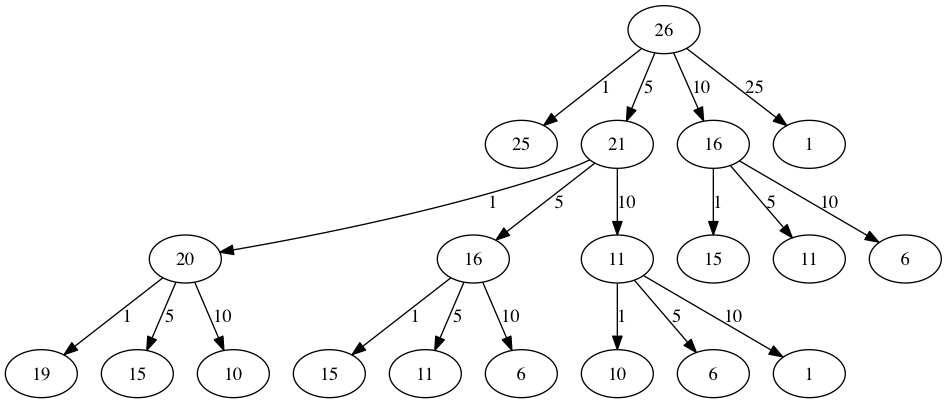

***Figure 3: Call Tree for Listing 7***

The key to cutting down on the amount of work we do is to remember some of the past results so we can avoid recomputing results we already know. A simple solution is to store the results for the minimum number of coins in a table when we find them. Then before we compute a new minimum, we first check the table to see if a result is already known. If there is already a result in the table, we use the value from the table rather than recomputing. ActiveCode 1 shows a modified algorithm to incorporate our table lookup scheme.

In [5]:
# _dsp-4_12_1-lst_change2.py

def make_change_2(coin_value_list, change, known_results):
    min_coins = change
    if change in coin_value_list:
        known_results[change] = 1
        return 1
    elif known_results[change] > 0:
        return known_results[change]
    else:
        for i in [c for c in coin_value_list if c <= change]:
            num_coins = 1 + make_change_2(coin_value_list, change - i, known_results)
            if num_coins < min_coins:
                min_coins = num_coins
            known_results[change] = min_coins
    return min_coins

print(make_change_2([1, 5, 10, 25], 63, [0] * 64))


6


Notice that in line 6 we have added a test to see if our table contains the minimum number of coins for a certain amount of change. If it does not, we compute the minimum recursively and store the computed minimum in the table. Using this modified algorithm reduces the number of recursive calls we need to make for the four coin, 63 cent problem to 221 calls!

Although the algorithm in AcitveCode 1 is correct, it looks and feels like a bit of a hack. Also, if we look at the `known_results`b lists we can see that there are some holes in the table. In fact the term for what we have done is not dynamic programming but rather we have improved the performance of our program by using a technique known as memoization, or more commonly called caching.

A truly dynamic programming algorithm will take a more systematic approach to the problem. Our dynamic programming solution is going to start with making change for one cent and systematically work its way up to the amount of change we require. This guarantees that at each step of the algorithm we already know the minimum number of coins needed to make change for any smaller amount.

Let’s look at how we would fill in a table of minimum coins to use in making change for 11 cents. Figure 4 illustrates the process. We start with one cent. The only solution possible is one coin (a penny). The next row shows the minimum for one cent and two cents. Again, the only solution is two pennies. The fifth row is where things get interesting. Now we have two options to consider, five pennies or one nickel. How do we decide which is best? We consult the table and see that the number of coins needed to make change for four cents is four, plus one more penny to make five, equals five coins. Or we can look at zero cents plus one more nickel to make five cents equals one coin. Since the minimum of one and five is one we store 1 in the table. Fast forward again to the end of the table and consider 11 cents. Figure 5 shows the three options that we have to consider:

1. A penny plus the minimum number of coins to make change for 11-1 = 10 cents (1)

2. A nickel plus the minimum number of coins to make change for 11 - 5 = 6 cents (2)

3. A dime plus the minimum number of coins to make change for 11 - 5 = 1 cent (1)

Either option 1 or 3 will give us a total of two coins which is the minimum number of coins for 11 cents.


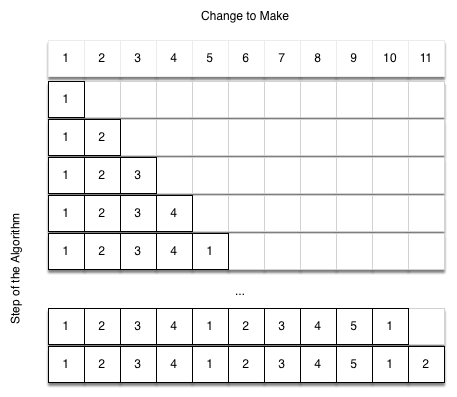

***Figure 4: Minimum Number of Coins Needed to Make Change***

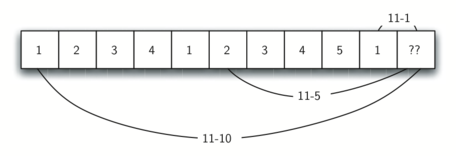

***Figure 5: Three Options to Consider for the Minimum Number of Coins for Eleven Cents***

```
# Listing 8

def make_change_3(coin_value_list, change, min_coins):
   for cents in range(change + 1):
      coin_count = cents
      for j in [c for c in coin_value_list if c <= cents]: # line 4
            if min_coins[cents - j] + 1 < coin_count:
               coin_count = min_coins[cents - j] + 1
      min_coins[cents] = coin_count
   return min_coins[change]
```

Note that `make_change_3` is not a recursive function, even though we started with a recursive solution to this problem. It is important to realize that a recursive solution to a problem will not necessarily be the most efficient solution. The bulk of the work in this function is done by the loop that starts on line 4. In this loop we consider using all possible coins to make change for the amount specified by cents. Like we did for the 11 cent example above, we remember the minimum value and store it in our `min_coins` list.

Although our making change algorithm does a good job of figuring out the minimum number of coins, it does not help us make change since we do not keep track of the coins we use. We can easily extend `make_change_3` to keep track of the coins used by simply remembering the last coin we add for each entry in the `min_coins` table. If we know the last coin added, we can simply subtract the value of the coin to find a previous entry in the table that tells us the last coin we added to make that amount. We can keep tracing back through the table until we get to the beginning.

ActiveCode 2 shows `make_change_4`, based on the `make_change_3` algorithm but modified to keep track of the coins used, along with a function `print_coins` that walks backward through the table to print out the value of each coin used. This shows the algorithm in action solving the problem for our friends in Lower Elbonia. The first two lines of main set the amount to be converted and create the list of coins used. The next two lines create the lists we need to store the results. `coins_used` is a list of the coins used to make change, and `coin_count` is the minimum number of coins used to make change for the amount corresponding to the position in the list.

Notice that the coins we print out come directly from the `coins_used` array. For the first call we start at array position 63 and print 21. Then we take `63 - 21 = 42` and look at the 42nd element of the list. Once again we find a 21 stored there. Finally, element 21 of the array also contains 21, giving us the three 21 cent pieces.

In [6]:
# _dsp-4_12_2-lst_dpremember.py

def make_change_4(coin_value_list, change, min_coins, coins_used):
    for cents in range(change + 1):
        coin_count = cents
        new_coin = 1
        for j in [c for c in coin_value_list if c <= cents]:
            if min_coins[cents - j] + 1 < coin_count:
                coin_count = min_coins[cents - j] + 1
                new_coin = j
        min_coins[cents] = coin_count
        coins_used[cents] = new_coin
    return min_coins[change]


def print_coins(coins_used, change):
    coin = change
    while coin > 0:
        this_coin = coins_used[coin]
        print(this_coin, end=" ")
        coin = coin - this_coin
    print()


def main():
    amnt = 63
    clist = [1, 5, 10, 21, 25]
    coins_used = [0] * (amnt + 1)
    coin_count = [0] * (amnt + 1)

    print(
       "Making change for {} requires the following {} coins: ".format(
             amnt, make_change_4(clist, amnt, coin_count, coins_used)
       ),
       end="",
    )
    print_coins(coins_used, amnt)
    print("The used list is as follows:")
    print(coins_used)


main()


Making change for 63 requires the following 3 coins: 21 21 21 
The used list is as follows:
[1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 10, 1, 1, 1, 1, 5, 1, 1, 1, 1, 10, 21, 1, 1, 1, 25, 1, 1, 1, 1, 5, 10, 1, 1, 1, 10, 1, 1, 1, 1, 5, 10, 21, 1, 1, 10, 21, 1, 1, 1, 25, 1, 10, 1, 1, 5, 10, 1, 1, 1, 10, 1, 10, 21]


### 4.13 - Summary

In this chapter we have looked at examples of several recursive algorithms. These algorithms were chosen to expose you to several different problems where recursion is an effective problem-solving technique. The key points to remember from this chapter are as follows:

-    All recursive algorithms must have a base case.

-    A recursive algorithm must change its state and make progress toward the base case.

-    A recursive algorithm must call itself (recursively).

-    Recursion can take the place of iteration in some cases.

-    Recursive algorithms often map very naturally to a formal expression of the problem you are trying to solve.

-    Recursion is not always the answer. Sometimes a recursive solution may be more computationally expensive than an alternative algorithm.


### 4.14 - Key Terms

- base case

- greedy method
	
- stack frame

- dynamic programming
	
- recursion
	
- fractal
	
- recursive call

### 4.15 - Discussion Questions

1. Draw a call stack for the Tower of Hanoi problem. Assume that you start with a stack of three disks.


2. Using the recursive rules as described, draw a Sierpinski triangle using paper and pencil.


3. Using the dynamic programming algorithm for making change, find the smallest number of coins that you can use to make 33 cents in change. In addition to the usual coins assume that you have an 8 cent coin.


### 4.16 - Glossary

This is from the precursor book HTT's Chapter 16, with many of these terms already covered...

***base case***

    A branch of the conditional statement in a recursive function that does not give rise to further recursive calls.

***data structure***

    An organization of data for the purpose of making it easier to use.

***exception***

    An error that occurs at runtime.

***handle an exception***

    To prevent an exception from terminating a program by wrapping the block of code in a try / except construct.

***immutable data type***

    A data type which cannot be modified. Assignments to elements or slices of immutable types cause a runtime error.

***infinite recursion***

    A function that calls itself recursively without ever reaching the base case. Eventually, an infinite recursion causes a runtime error.

***mutable data type***

    A data type which can be modified. All mutable types are compound types. Lists and dictionaries (see next chapter) are mutable data types; strings and tuples are not.

***raise***

    To cause an exception by using the raise statement.

***recursion***

    The process of calling the function that is already executing.

***recursive call***

    The statement that calls an already executing function. Recursion can even be indirect — function f can call g which calls h, and h could make a call back to f.

***recursive definition***

    A definition which defines something in terms of itself. To be useful it must include base cases which are not recursive. In this way it differs from a circular definition. Recursive definitions often provide an elegant way to express complex data structures.

***tuple***

    A data type that contains a sequence of elements of any type, like a list, but is immutable. Tuples can be used wherever an immutable type is required, such as a key in a dictionary (see next chapter).

***tuple assignment***

    An assignment to all of the elements in a tuple using a single assignment statement. Tuple assignment occurs in parallel rather than in sequence, making it useful for swapping values.


### 4.17 - Programming Exercises

1. Write a recursive function to compute the factorial of a number.


2. Write a recursive function to reverse a list.


3. Modify the recursive tree program using one or all of the following ideas:

- Modify the thickness of the branches so that as the branch_len gets smaller, the line gets thinner.

- Modify the color of the branches so that as the branch_len gets very short it is colored like a leaf.

- Modify the angle used in turning the turtle so that at each branch point the angle is selected at random in some range. For example, choose an angle between 15 and 45 degrees. Play around to see what looks good.

- Modify the branch_len recursively so that instead of always subtracting the same amount you subtract a random amount in some range.

   If you implement all of the above ideas you will have a very realistic looking tree.

4. Find or invent an algorithm for drawing a fractal mountain. Hint: one approach to this uses triangles again.


5. Write a recursive function to compute the Fibonacci sequence. How does the performance of the recursive function compare to that of an iterative version?


6. Implement a solution to the Tower of Hanoi using three stacks to keep track of the disks.


7. Using the turtle graphics module, write a recursive program to display a Hilbert curve.


8. Using the turtle graphics module, write a recursive program to display a Koch snowflake.


9. Write a program to solve the following problem. You have two jugs: a 4-gallon jug and a 3-gallon jug. Neither of the jugs have markings on them. There is a pump that can be used to fill the jugs with water. How can you get exactly two gallons of water in the 4-gallon jug?


10. Generalize the problem above so that the parameters to your solution include the sizes of each jug and the final amount of water to be left in the larger jug.


11. Write a program that solves the following problem. Three missionaries and three cannibals come to a river and find a boat that holds two people. Everyone must get across the river to continue on the journey. However, if the cannibals ever outnumber the missionaries on either bank, the missionaries will be eaten. Find a series of crossings that will get everyone safely to the other side of the river.


12. Modify the Tower of Hanoi program using turtle graphics to animate the movement of the disks. Hint: you can make multiple turtles and have them shaped like rectangles.

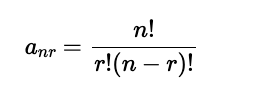

13. Pascal’s triangle is a number triangle with numbers arranged in staggered rows such that 

Shown above is the formula for a binomial coefficient. You can build Pascal’s triangle by adding the two numbers that are diagonally above a number in the triangle. An example of Pascal’s triangle is shown below.
    
```
            1
          1   1
        1   2   1
      1   3   3   1
    1   4   6   4   1
```

Write a program that prints out Pascal’s triangle. Your program should accept a parameter that tells how many       rows of the triangle to print.


14. Suppose you are a computer scientist/art thief who has broken into a major art gallery. All you have with you to haul out your stolen art is your knapsack which only holds W pounds of art, but for every piece of art you know its value and its weight. Write a dynamic programming function to help you maximize your profit. Here is a sample problem for you to get started: suppose your knapsack can hold a total weight of 20 pounds. You have 5 items as follows:

```
item     weight      value
  1        2           3
  2        3           4
  3        4           8
  4        5           8
  5        9          10
```

15. This problem is called the string edit distance problem, and is quite useful in many areas of research. Suppose that you want to transform the word algorithm into the word alligator. For each letter you can either copy the letter from one word to another at a cost of 5, you can delete a letter at cost of 20, or insert a letter at a cost of 20. The total cost to transform one word into another is used by spell-check programs to provide suggestions for words that are close to one another. Use dynamic programming techniques to develop an algorithm that gives you the smallest edit distance between any two words.